注:该文为 https://github.com/jayleicn/scipy-lecture-notes-zh-CN/releases 的学习笔记

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# 解决字体问题
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 12  # 字体大小
mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

## 在同一个figure中绘制多张图片

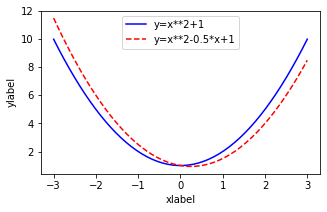

In [2]:
# 构造数据
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1

y2 = x**2 + 1

y3 = x**2 - 0.5*x + 1

# 在同一个figure中绘制多张图片
plt.figure(figsize=(5, 3))
plt.plot(x, y2, color='b', label="y=x**2+1")
plt.plot(x, y3, color='r', linestyle='--', label="y=x**2-0.5*x+1")

# 设置坐标轴标签
plt.xlabel('xlabel')
plt.ylabel('ylabel')

# 设置图例
plt.legend(loc='best')

plt.show()

## 散点图(plt.scatter)

In [6]:
plt.scatter?

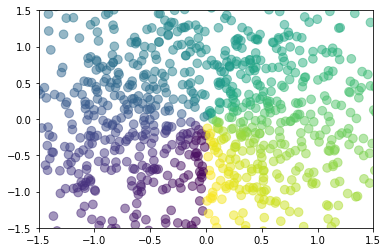

In [3]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(X, Y) # for color

plt.scatter(X, Y, s=75, c=T, alpha=0.5)
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.show()

## 柱状图(plt.bar)

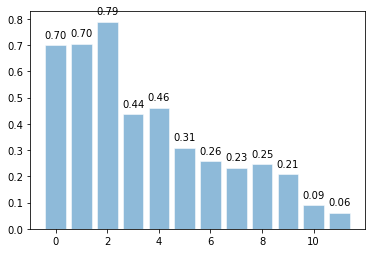

In [7]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, Y1, alpha=0.5, edgecolor='white')

for x,y in zip(X, Y1):
    plt.text(x, y+0.02, '%.2f' % y,
             ha='center', va='bottom') # ha:horizontal alignment

plt.show()

## 等高线图(np.meshgrid)

<ipython-input-8-41114f130b24>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, Z, 8, colors='black', linewidth=.5)


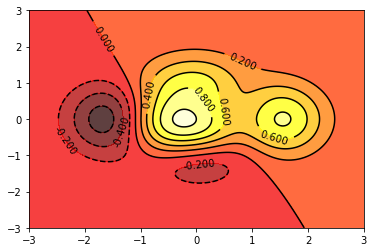

In [8]:
# 构造数据
# the height function
def f_height(x,y):
    z = (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)
    return z

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

X,Y = np.meshgrid(x, y)
Z = f_height(X, Y)

# 绘图

# 使用plt.contourf填充轮廓(颜色)
plt.contourf(X, Y, Z, 8, alpha=0.75, cmap=plt.cm.hot)
# 使用plt.contour添加轮廓线
C = plt.contour(X, Y, Z, 8, colors='black', linewidth=.5)
# 在线上显示对应的数值
plt.clabel(C, inline=True, fontsize=10)

plt.show()

## image出图

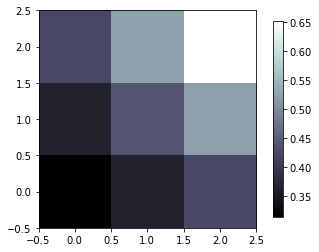

In [9]:
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=0.9)
plt.show()

## 3D图（Axes3D）

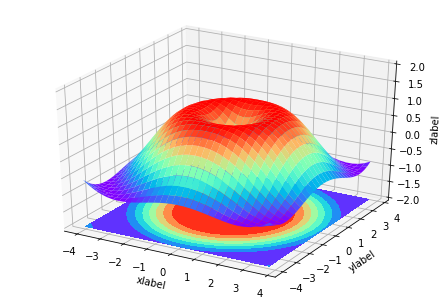

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# 构造数据
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2+Y**2))

# 绘图
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

# 绘制在指定轴投影的等高线图. zdir:指定等高线图压缩的轴, offset:指定等高线图的位置
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap='rainbow')

ax.set_zlim(-2, 2)
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
ax.set_zlabel('zlabel')

plt.show()

## subplot多个子图

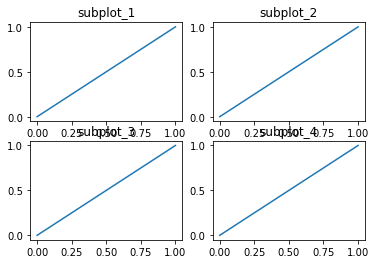

In [11]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1])
plt.title('subplot_1')

plt.subplot(2, 2, 2)
plt.plot([0, 1], [0, 1])
plt.title('subplot_2')

plt.subplot(2, 2, 3)
plt.plot([0, 1], [0, 1])
plt.title('subplot_3')

plt.subplot(2, 2, 4)
plt.plot([0, 1], [0, 1])
plt.title('subplot_4')

plt.show()

Text(0.5, 1.0, 'subplot_4')

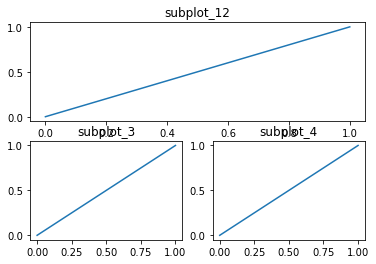

In [12]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot([0, 1], [0, 1])
plt.title('subplot_12')

plt.subplot(2, 2, 3)
plt.plot([0, 1], [0, 1])
plt.title('subplot_3')

plt.subplot(2, 2, 4)
plt.plot([0, 1], [0, 1])
plt.title('subplot_4')

## subplot分格显示

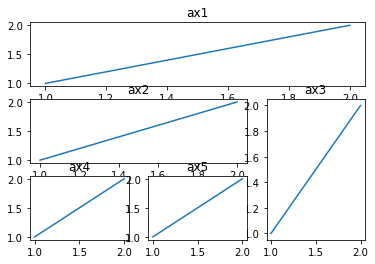

In [13]:
# 方法一

plt.figure()

# plt.subplot2grid: 第一参数指定整个大图的格子, 第二个参数指定当前子图从大图的哪个格子开始
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=3)
ax1.plot([1, 2], [1, 2])
ax1.set_title('ax1')

ax2 = plt.subplot2grid((3, 3), (1, 0), rowspan=1, colspan=2)
ax2.plot([1, 2], [1, 2])
ax2.set_title('ax2')

ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2, colspan=1)
ax3.plot([1, 2], [1, 2])
ax3.set_title('ax3')

ax4 = plt.subplot2grid((3, 3), (2, 0), rowspan=1, colspan=1)
ax4.plot([1, 2], [1, 2])
ax4.set_title('ax4')

ax5 = plt.subplot2grid((3, 3), (2, 1), rowspan=1, colspan=1)
ax5.plot([1, 2], [1, 2])
ax5.set_title('ax5')

plt.show()

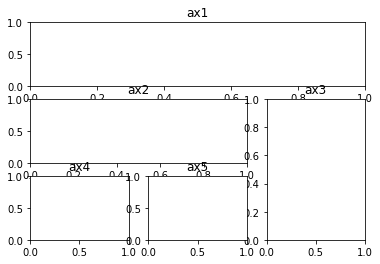

In [14]:
# 方法二
import matplotlib.gridspec as gridspec

plt.figure()
gs = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[1:, 2])
ax4 = plt.subplot(gs[2, 0])
ax5 = plt.subplot(gs[2, 1])

ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')
ax4.set_title('ax4')
ax5.set_title('ax5')

plt.show()

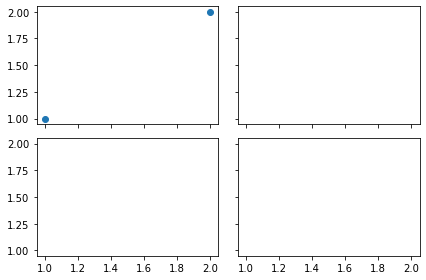

In [15]:
# 方法三
fig, ((ax1_1, ax1_2), (ax2_1, ax2_2)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1_1.scatter([1, 2], [1, 2])
plt.tight_layout()
plt.show()

## 图中图（fig.add_axes）

Text(0.5, 1.0, 'title inside 2')

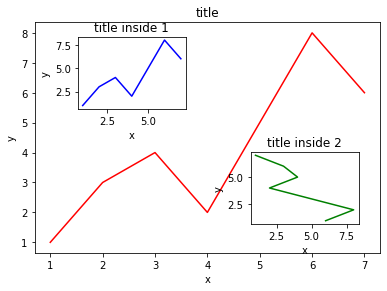

In [16]:
fig = plt.figure()
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 4, 2, 5, 8, 6]

left, bootom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bootom, width, height])
ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')


left, bootom, width, height = 0.2, 0.6, 0.25, 0.25
ax2 = fig.add_axes([left, bootom, width, height])
ax2.plot(x, y, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')

plt.axes([.6, .2, .25, .25])
plt.plot(y[::-1], x, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

## 双坐标轴

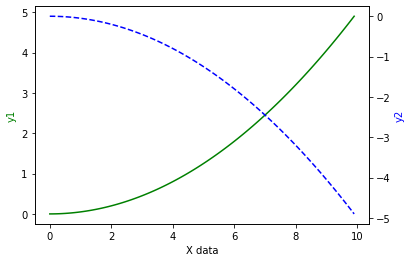

In [17]:
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 * y1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b--')

ax1.set_xlabel('X data')
ax1.set_ylabel('y1', color='g')
ax2.set_ylabel('y2', color='b')

plt.show()

## Animation动画

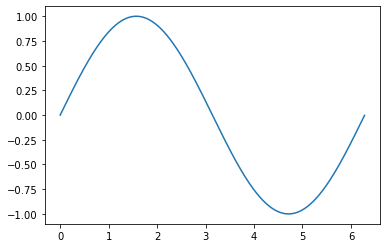

In [18]:
from matplotlib import animation
fig, ax = plt.subplots()
x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def f_animation(i):
    line.set_ydata(np.sin(x+i/100))
    return line,

def f_init():
    line.set_ydata(np.sin(x))
    return line,

ani = animation.FuncAnimation(fig=fig, func=f_animation, frames=100, init_func=f_init, interval=20, blit=False)
plt.show()

## 坐标轴, 标注

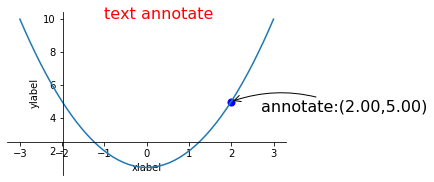

In [90]:
# 构造数据
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2 + 1


# 在同一个figure中绘制多张图片
plt.figure(figsize=(5, 3))
plt.plot(x, y2)
#plt.plot(x, y3, color='r', linestyle='--')

# 设置坐标轴标签
plt.xlabel('xlabel')
plt.ylabel('ylabel')

# 设置坐标轴的取值范围
# plt.xlim((-1, 2))
# plt.ylim((1, 3))

# 替换坐标轴标尺
# plt.xticks()
# plt.yticks()

# gca: get current axis
ax = plt.gca()
# 不显示右侧和顶部顶的轴体
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 设置底部轴为x, 左侧轴为y
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 设置轴的原点
# ax.spines['bottom'].set_position(('data', 1.5)) # 设置bottom轴的原点为取值1.5的位置
# ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('axes', 0.2)) # 设置bottom轴的原点为该轴20%处位置
ax.spines['left'].set_position(('axes', 0.2))


x0 = 2
y0 = x0**2 + 1
plt.scatter(x0, y0, s=50, color='b')
# 添加标注 method1
plt.annotate(r'annotate:(%.2f,%.2f)'%(x0,y0), xy=(x0,y0), xycoords='data', 
             xytext=(+30, -10), textcoords='offset points', fontsize=16, 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2')
            )
# 添加标注 method2
plt.text(-1, 10, r'text annotate',  fontdict={'size': 16, 'color': 'r'})

# 设置ticks
# for label in ax.get_xticklabels()+ax.get_yticklabels():
#     label.set_fontsize(12)
#     label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=.2))


plt.show()

## 饼状图

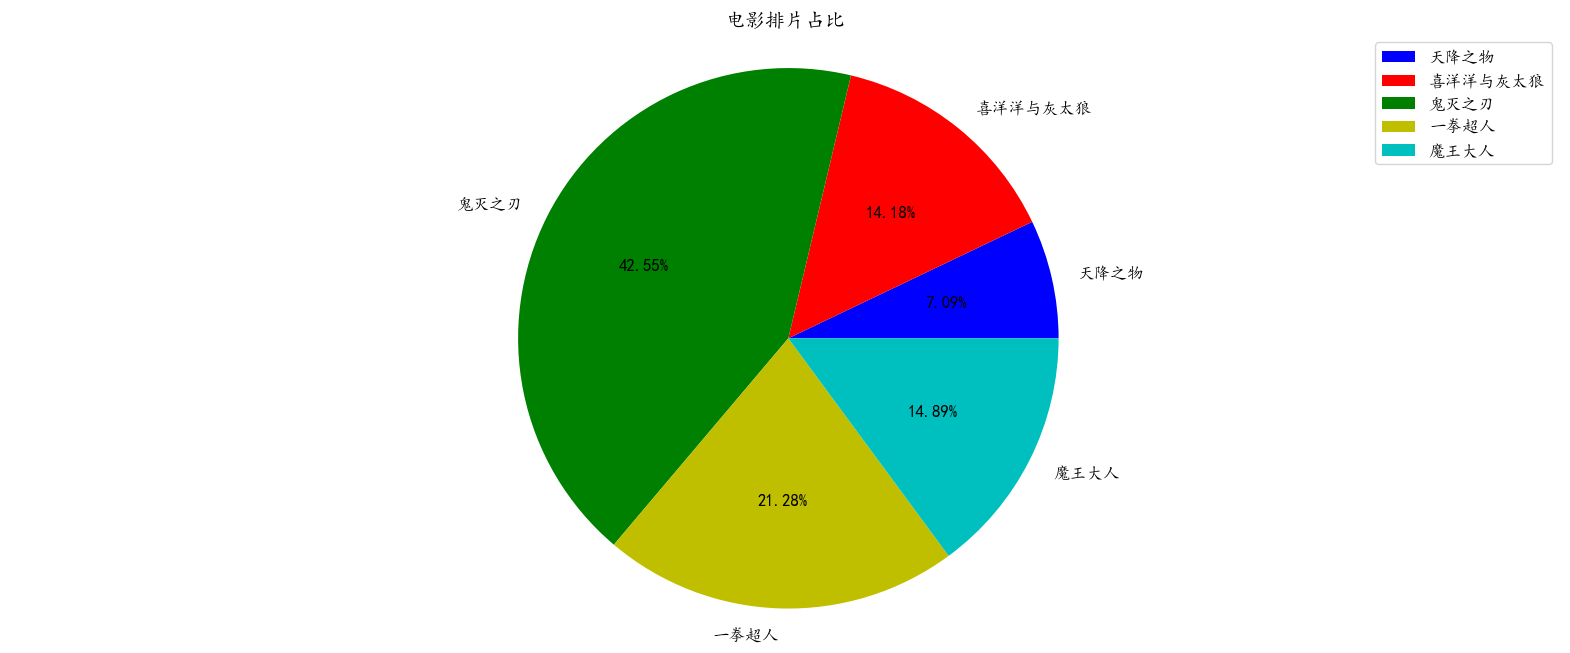

In [21]:
x = ['天降之物','喜洋洋与灰太狼','鬼灭之刃','一拳超人','魔王大人']
y = [11111,22222,66666,33333,23333]

plt.figure(figsize=(20, 8), dpi=100)
 
# 绘制饼图
plt.pie(y, labels = x, autopct="%1.2f%%", colors=['b','r','g','y','c'])
 
# 显示图例
plt.legend()
 
# 添加标题
plt.title("电影排片占比")

# 添加axis(使图像变圆)
plt.axis('equal')
plt.show()


# 子图布局

## subplot子图布局

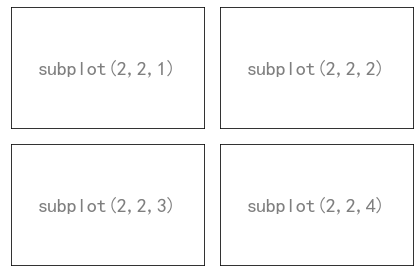

In [57]:
import matplotlib.pyplot as plt

# 画布
plt.figure(figsize=(6, 4))

# 子图
plt.subplot(2, 2, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,1)', ha='center', va='center',
        size=20, alpha=.5)

# 子图
plt.subplot(2, 2, 2)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,2)', ha='center', va='center',
        size=20, alpha=.5)

# 子图
plt.subplot(2, 2, 3)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,3)', ha='center', va='center',
        size=20, alpha=.5)

# 子图
plt.subplot(2, 2, 4)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,2,4)', ha='center', va='center',
        size=20, alpha=.5)

# 布局
plt.tight_layout()
plt.show()

## Axes子图布局
Axes 和 subplot 十分相似, 但是 axes 可以被置于 figure 任意位置.

In [63]:
plt.figure?

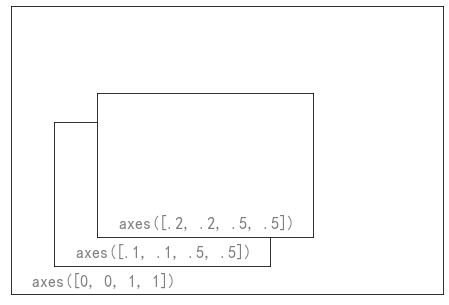

In [75]:
import matplotlib.pyplot as plt

# 参考位置
plt.axes([0, 0, 1, 1])
plt.xticks(())
plt.yticks(())
plt.text(0.05, 0.05, 'axes([0, 0, 1, 1])', ha='left', va='center',
        size=16, alpha=.5)

# 子图1
plt.axes([.1, .1, .5, .5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([.1, .1, .5, .5])', ha='left', va='center',
        size=16, alpha=.5)

# 子图2
plt.axes([.2, .2, .5, .5])
plt.xticks(())
plt.yticks(())
plt.text(0.1, 0.1, 'axes([.2, .2, .5, .5])', ha='left', va='center',
        size=16, alpha=.5)

plt.show()

## Ticks
 tick locators 标明 tick 的位置, tick formatters 标明 tick 的外观，并且主次刻度可以相互独立地设置各自的属性。

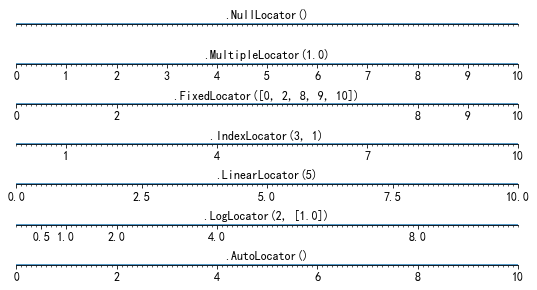

In [76]:
import numpy as np
import matplotlib.pyplot as plt


def tickline():
    plt.xlim(0, 10), plt.ylim(-1, 1), plt.yticks([])
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.plot(np.arange(11), np.zeros(11))
    return ax

locators = [
                'plt.NullLocator()',
                'plt.MultipleLocator(1.0)',
                'plt.FixedLocator([0, 2, 8, 9, 10])',
                'plt.IndexLocator(3, 1)',
                'plt.LinearLocator(5)',
                'plt.LogLocator(2, [1.0])',
                'plt.AutoLocator()',
            ]

n_locators = len(locators)

size = 512, 40 * n_locators
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)

# 使用子图展示各种tick
for i, locator in enumerate(locators):
    plt.subplot(n_locators, 1, i + 1)
    ax = tickline()
    ax.xaxis.set_major_locator(eval(locator))
    plt.text(5, 0.3, locator[3:], ha='center')

plt.subplots_adjust(bottom=.01, top=.99, left=.01, right=.99)
plt.show()

# 常见图像

## 散点图(plt.scatter)
eg:绘制下图(颜色由(X,Y)角度决定)
    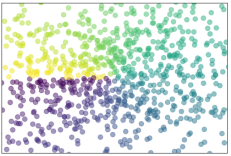

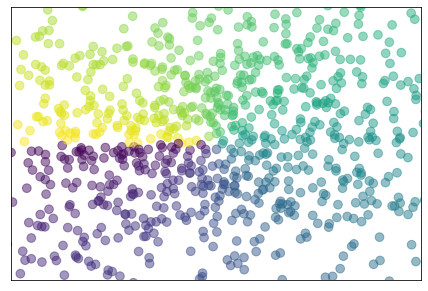

In [87]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5) # 散点图

plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())

plt.show()

## 条形图(plt.bar)
eg:绘制下图(注意文字信息)
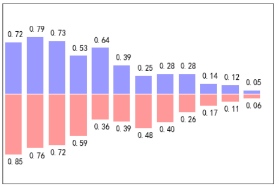

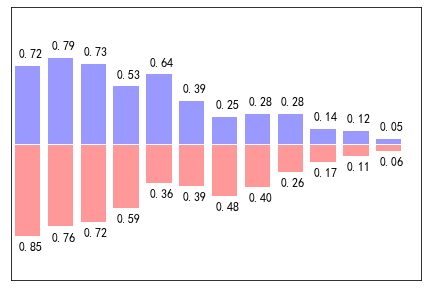

In [93]:
import numpy as np
import matplotlib.pyplot as plt

n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
# 上半部分
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
for x, y in zip(X, Y1):
    plt.text(x+0.1, y+0.05, '%.2f'%y, ha='center', va='bottom')
    
# 下半部分
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
for x, y in zip(X, Y2):
    plt.text(x+0.1, -y-0.05, '%.2f'%y, ha='center', va='top')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

## 饼图(plt.pie)
eg:绘制下图
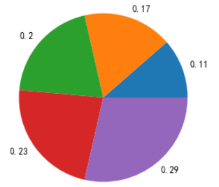

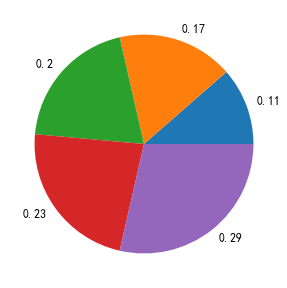

In [109]:
import numpy as np
import matplotlib.pyplot as plt

Z = [20, 30, 35, 40, 50]

plt.axes([0.025, 0.025, 0.95, 0.95]) # 子图

# 饼图
plt.pie(Z, explode=None, labels=[round(i/sum(Z), 2) for i in Z])

plt.xticks(())
plt.yticks()

plt.show()

## 坐标网格
eg:绘制下图
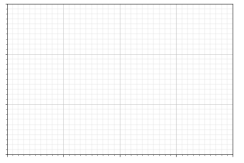

In [124]:
plt.MultipleLocator?

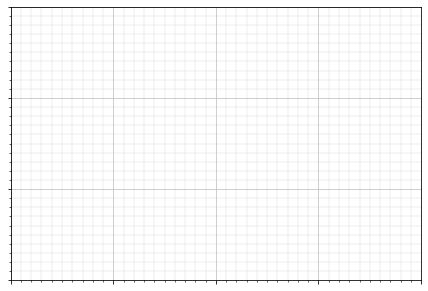

In [123]:
import matplotlib.pyplot as plt

ax = plt.axes([0.025, 0.025, 0.95, 0.95])
ax.set_xlim(0,4)
ax.set_ylim(0,3)

ax.xaxis.set_major_locator(plt.MultipleLocator(1.0)) # 设置X主ticker的locator(间隔1.0)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1)) # 设置X辅ticker的locator(间隔0.1)
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

## 填充域(plt.fill_between)
eg:绘制下图
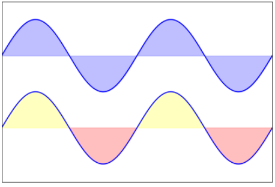

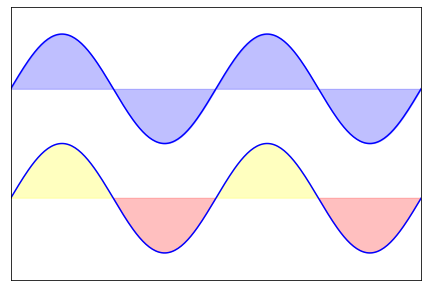

In [86]:
import numpy as np
import matplotlib.pyplot as plt

n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)

plt.axes([0.025, 0.025, 0.95, 0.95])

# 绘制上半部分(单色填充图)
plt.plot(X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, y1=1, y2=Y+1, color='blue', alpha=.25)

# 绘制下半部分(双色填充图)
plt.plot(X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, y1=-1, y2=Y-1, where=((Y-1)>-1), color='yellow', alpha=.25)
plt.fill_between(X, y1=-1, y2=Y-1, where=((Y-1)<-1), color='red',  alpha=.25)

plt.xlim(-np.pi, np.pi)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())

plt.show()

## 极坐标条形图(plt.axes参数polar=True)
eg:绘制下图
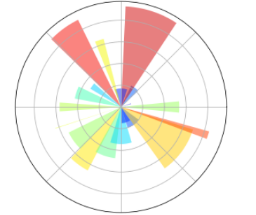


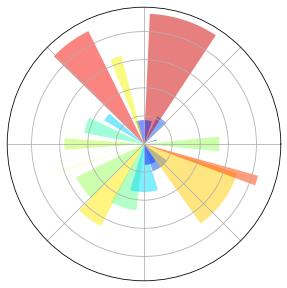

In [125]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True) # 极坐标子图

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N) # 角度 # 将[0, 2*pi]分为N份
radii = 10 * np.random.rand(N) # 径长
width = np.pi / 4 * np.random.rand(N) # 宽度
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

## 3D Plots (Axes3D)
eg:绘制下图
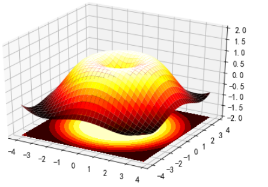


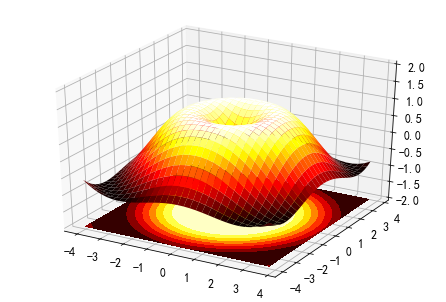

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig) # 3D图
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

## Text
eg:绘制下图
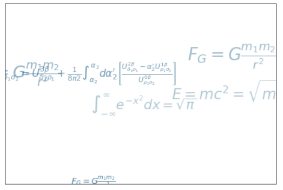

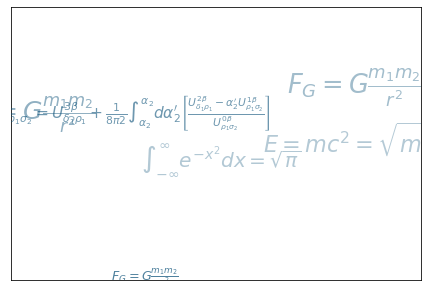

In [134]:
import numpy as np
import matplotlib.pyplot as plt


eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))

plt.axes([0.025, 0.025, 0.95, 0.95])

for i in range(6):
    index = np.random.randint(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x,y = np.random.uniform(0, 1, 2)
    alpha = np.random.uniform(0.25, .75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
         transform=plt.gca().transAxes, fontsize=size, clip_on=True)
plt.xticks(())
plt.yticks(())

plt.show()

# 完整的例子

## 方形坐标边框

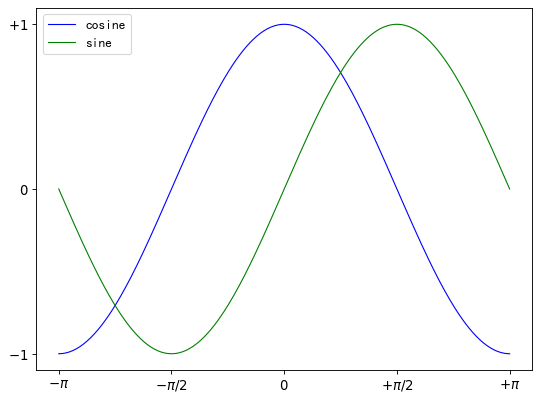

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)


# 创建一个8x6英寸的画布, 每英寸80个点
plt.figure(figsize=(8, 6), dpi=80)

# 从1x1的网格中创建一个新的子图
plt.subplot(1, 1, 1)



# 设置线宽和颜色, 并添加图例
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label="cosine")
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label="sine")
plt.legend(loc='upper left')

# 设置坐标范围
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

# 设置坐标轴刻度
# plt.xticks(np.linspace(-np.pi, np.pi, 5, endpoint=True))
# plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# 设置坐标轴刻度, 并使用指定的符号代替数字刻度(这里使用了latex公式)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

# 使用72点每英寸保存
# plt.savefig("exercice_2.png", dpi=72)

plt.show()

## 移动轴线(以十字直角坐标展示)

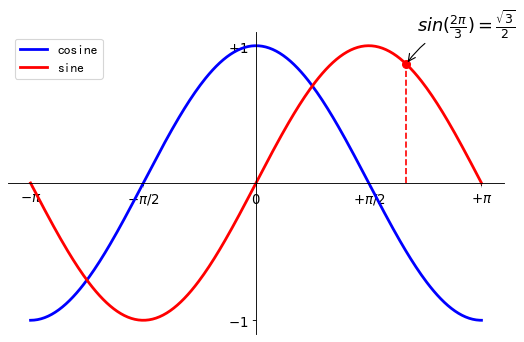

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C = np.cos(X)
S = np.sin(X)

# 画布 & 子图
plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(111)

# 绘制
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")
plt.legend(loc='upper left') # 图例

# 调整坐标轴
ax = plt.gca() # gca()函数用于获取当前轴
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# 设置坐标范围
plt.xlim(X.min() * 1.1, X.max() * 1.1)
plt.ylim(C.min() * 1.1, C.max() * 1.1)

# # 设置坐标轴刻度
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, +1],
          [r'$-1$', r'$+1$'])

# 标注数据点
t = 2*np.pi/3
plt.plot([t, t], [0, np.sin(t)],
        color='red', linewidth=1.5, linestyle="--")
plt.scatter([t, ], [np.sin(t), ], 50, color='red')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# 调整坐标刻度的字体大小和背景透明度
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

plt.show()